<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#AB-Testing" data-toc-modified-id="AB-Testing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>AB-Testing</a></span></li></ul></div>

# AB-Testing

![cats](images/cats.jpeg)


Imaginad que somos los cientificos de datos de la empresa de videojuegos Tactile Entertainment. Los desarrolladores del juego Cookie Cats pretenden introducir un cambio en el juego para aumentar la retencion de los jugadores. En cierto nivel del juego los jugadores se encuentran una puerta que les obliga a esperar o a pagar la app. Actualmente la puerta se encuentra en nivel 30 y se pretende pasar al nivel 40, para comprobar la retencion a 1 y 7 dias. Antes de realizar el cambio definitivo en el juego se raliza un test AB.

Los datos estan alojados en `data/cookie_cats.csv`. Nuestro grupo de control sera la version actual `gate_30` y el grupo de tratamiento sera la version `gate_40`. Debemos realizar el test para 1 dia de retencion `retention_1` y para 7 dias `retention_7`.

In [1]:
# librerias

import pandas as pd
import numpy as np

from statsmodels.stats.proportion import proportions_ztest, proportion_confint
from scipy.stats import norm, sem

import pylab as plt
from scipy.stats import bernoulli, beta

from bayes import *

In [2]:
# datos
data = pd.read_csv('data/cookie_cats.csv')
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
data['version'].value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

In [4]:
imps_ctrl = data[(data['version'] == 'gate_30')]

len(imps_ctrl)

44700

In [5]:
convs_ctrl = data[(data['version'] == 'gate_30') & (data['retention_1'] == True)]

len(convs_ctrl)

20034

In [6]:
imps_test = data[(data['version'] == 'gate_40')]

len(imps_test)

45489

In [7]:
convs_test = data[(data['version'] == 'gate_40') & (data['retention_1'] == True)]

len(convs_test)

20119

In [8]:
imps_ctrl, convs_ctrl = 44700, 20034
imps_test, convs_test = 45489, 20119

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.4481879194630872, Test: 0.44228274967574577'

In [9]:
# a prioris

a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [10]:
beta_control.mean(), beta_test.mean()

(0.44819023757326293, 0.44228528719966587)

In [11]:
def plot(betas, names, linf=0.42, lsup=0.46):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

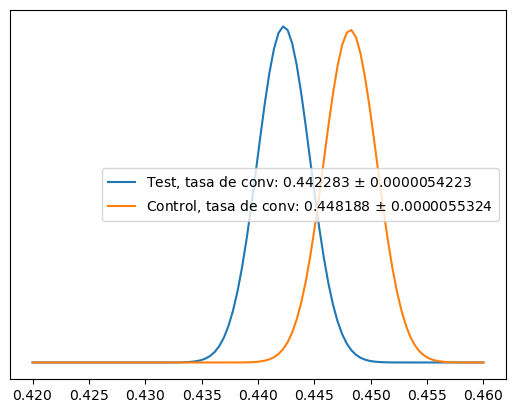

In [12]:
plot([beta_test,beta_control],['Test','Control'])

In [13]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()

salto

0.013175098158249857

In [14]:
prob = calc_prob(beta_control, beta_test)
prob

0.9627939748515354

In [15]:
'''El control aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El control aumenta la tasa de conversion en un 1.32%, con una probabilidad del 96.28%'

In [16]:
# testeo para retention_7

In [17]:
convs_ctrl = data[(data['version'] == 'gate_30') & (data['retention_7'] == True)]

len(convs_ctrl)

8502

In [18]:
convs_test = data[(data['version'] == 'gate_40') & (data['retention_7'] == True)]

len(convs_test)

8279

In [19]:
imps_ctrl, convs_ctrl = 44700,8502 
imps_test, convs_test = 45489, 8279

CR_ctrl = convs_ctrl/imps_ctrl
CR_test = convs_test/imps_test

f'Tasas conversion: Control: {CR_ctrl}, Test: {CR_test}'

'Tasas conversion: Control: 0.19020134228187918, Test: 0.18200004396667327'

In [20]:
a_C, b_C = 1+convs_ctrl, 1+imps_ctrl-convs_ctrl

a_T, b_T = 1+convs_test, 1+imps_test-convs_test


beta_control = beta(a_C, b_C)

beta_test = beta(a_T, b_T)

In [21]:
beta_control.mean(), beta_test.mean()

(0.19021520289919913, 0.18201402475214878)

In [22]:
def plot(betas, names, linf=0.17, lsup=0.2):
    x=np.linspace(linf, lsup, 100)
    for f, n in zip(betas, names):
        y=f.pdf(x)
        y_pico=pico(f.args[0], f.args[1])
        y_var=f.var()
        plt.plot(x, y, label='{}, tasa de conv: {:.6f} $\pm$ {:.10f}'.format(n, y_pico, y_var))
        plt.yticks([])
    plt.legend()
    plt.show();

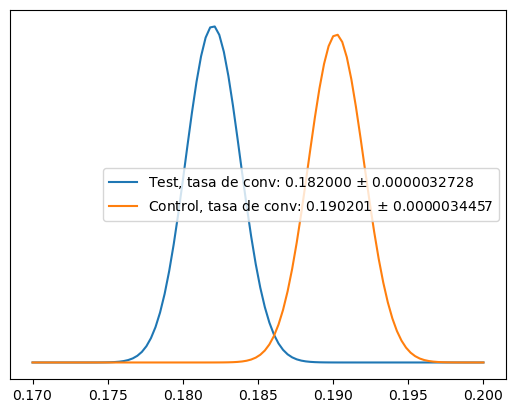

In [23]:
plot([beta_test,beta_control,],['Test','Control'])

In [24]:
salto = (beta_control.mean() - beta_test.mean())/beta_control.mean()

salto

0.04311526114658881

In [25]:
prob = calc_prob(beta_control, beta_test)
prob

0.9992226613235504

In [26]:
'''El control aumenta la tasa de conversion en un {:2.2f}%, con una probabilidad del {:2.2f}%'''.format(salto*100, prob*100)

'El control aumenta la tasa de conversion en un 4.31%, con una probabilidad del 99.92%'

In [27]:
# conclusiones
# Explica detalladamente las conclusiones obtenidas de. tu testeo.
'''
Las conclusiones obtenidas indican que no vale la pena subir el nivel 40 para tener mayor retención
'''